<a href="https://colab.research.google.com/github/Shrey1012/AI.Rookies/blob/master/Lab%207/AI_LAB7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from skimage import data, io, filters
from matplotlib import pyplot as plt
from PIL import Image
from skimage.transform import resize
import random
%matplotlib inline

PART A

Image Dimensions: (512, 512)


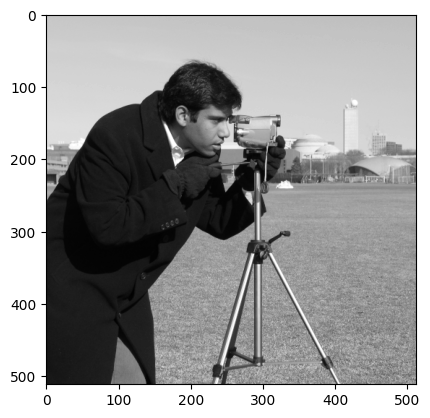

In [2]:
cameraman = data.camera()
print("Image Dimensions:", cameraman.shape)

# Display the image using matplotlib's imshow function
# Use the 'gray' color map to display the image in grayscale
plt.imshow(cameraman, cmap='gray')

In [3]:
def binarize_img(im):
    # Convert the input image to a binary image
    # by dividing all pixel values by 255. 
    # This scales the pixel values to the range [0,1].
    bin_im = im / 255.

    # Make the array writeable so that we can modify its values
    bin_im.flags.writeable = True

    # Set all pixel values less than 0.5 to 0 (black),
    # and all pixel values greater than or equal to 0.5 to 1 (white)
    bin_im[bin_im < 0.5] = 0
    bin_im[bin_im >= 0.5] = 1

    # Return the binary image
    return bin_im

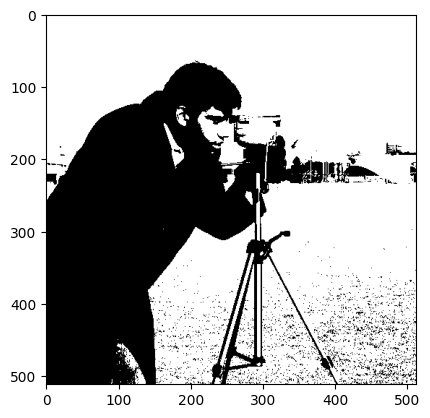

In [4]:
bin_cameraman = binarize_img(cameraman)

plt.imshow(bin_cameraman, cmap='gray')

In [5]:
def add_noise(img, thresh=0.05):
    # Get the dimensions of the input image
    N, M = img.shape
    
    # Create a copy of the input image to add noise to
    noisy_img = img.copy()
    
    # Generate random noise with the same dimensions as the input image
    noise = np.random.rand(N, M)
    
    # Set all values in the noise array less than 1-thresh to 0 (black),
    # and all values greater than or equal to 1-thresh to 1 (white)
    noise[noise < 1-thresh] = 0
    noise[noise >= 1-thresh] = 1
    
    # Add the noise to the input image, and convert the resulting pixel values
    # to binary (0 or 1) using the modulo 2 operation
    noisy_img = (noisy_img + noise) % 2
    
    # Return the noisy image
    return noisy_img


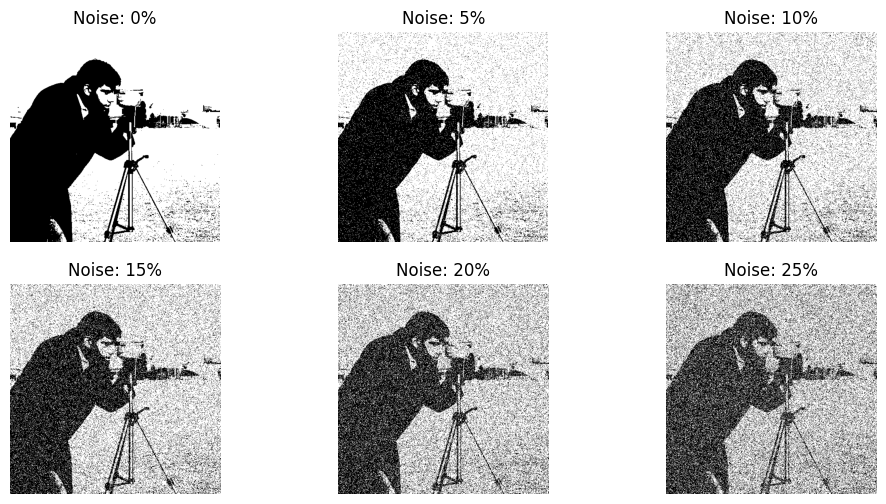

In [6]:
# Create a figure with a size of 12x6 inches
fig = plt.figure(figsize=(12, 6))

# Loop over a range of 6 values (0 to 5)
for i in range(0, 5 + 1):
    # Calculate the noise threshold value as a fraction of i/20
    thresh = i/20
    
    # Add noise to the binary cameraman image using the current threshold value
    noisy_img = add_noise(bin_cameraman, thresh)
    
    # Create a subplot in the figure with 2 rows, 3 columns, and the current index
    plt.subplot(2, 3, i+1)
    
    # Set the title of the subplot to the current noise level
    plt.title(f'Noise: {thresh*100:.0f}%')
    
    # Turn off the axis labels
    plt.axis('off')
    
    # Display the noisy image in the subplot using grayscale colormap
    plt.imshow(noisy_img, cmap='gray')
    
# Show the figure
plt.show()


In [7]:
def get_neighbours(i, j, M, N):
    # Initialize an empty list to store the coordinates of the neighbouring pixels
    neighbours = []
    
    # Check if the current pixel has a neighbour above it, and add its coordinates to the list
    if i > 0:
        neighbours.append([i-1, j])
        
    # Check if the current pixel has a neighbour below it, and add its coordinates to the list
    if i < M-1:
        neighbours.append([i+1, j])
        
    # Check if the current pixel has a neighbour to its left, and add its coordinates to the list
    if j > 0:
        neighbours.append([i, j-1])
        
    # Check if the current pixel has a neighbour to its right, and add its coordinates to the list
    if j < N-1:
        neighbours.append([i, j+1])

    # Return the list of neighbouring pixel coordinates
    return neighbours


In [8]:
def enrg(new, old, y, neighbours):
    lmda = -100
    return (new - old)**2 + lmda * np.sum((new - y[neighbour[0], neighbour[1]])**2 for neighbour in neighbours)

In [9]:
def diff(y, y_old):
    diff = abs(y - y_old) / 2
    return (100.0 * np.sum(diff)) / np.size(y)

In [10]:
def denoise(noisy_img):
    # Get the dimensions of the noisy image
    M, N = noisy_img.shape
    
    # Make a copy of the noisy image to store the denoised image
    y = noisy_img.copy()
    
    # Set the maximum number of iterations for the denoising algorithm
    maxiter = 5*M*N

    # Loop over the pixels in the image for the specified number of iterations
    for iter in range(maxiter):
        # Choose a random pixel in the image
        i = np.random.randint(M)
        j = np.random.randint(N)
        
        # Get the coordinates of the neighbouring pixels of the current pixel
        neighbours = get_neighbours(i, j, M, N)
        
        # Calculate the energy of flipping the current pixel to 1 or 0
        enrg_1 = enrg(1, y[i, j], y, neighbours)
        enrg_0 = enrg(0, y[i, j], y, neighbours)

        # Flip the pixel to 1 or 0 based on the energy comparison
        if enrg_1 > enrg_0:
            y[i, j] = 1
        else:
            y[i, j] = 0
        
        # Print the percentage of denoized pixels every 100,000 iterations
        if iter % 100000 == 0:
            print(f'Completed {iter} iterations out of {maxiter}. Denoized pixels are: {diff(y, noisy_img)}%')

    # Return the denoised image
    return y


In [ ]:
fig = plt.figure(figsize=(8, 20))

for i in range(1, 5 + 1):
    thresh = i/20
    print(f"Denoising for noise level: {thresh*100}")

    noisy_img = add_noise(bin_cameraman, thresh)
    denoised_img = denoise(noisy_img)

    plt.subplot(5, 2, 2*i-1)
    plt.title(f'Noise: {thresh*100}%')
    plt.axis('off')
    plt.imshow(noisy_img, cmap='gray')

    plt.subplot(5, 2, 2*i)
    plt.title(f'Denoised image ({diff(noisy_img, denoised_img)}%)')
    plt.axis('off')
    plt.imshow(denoised_img, cmap='gray')

    print()
plt.show()

Denoising for noise level: 5.0
Completed 0 iterations out of 1310720. Denoized pixels are: 0.0%


<ipython-input-8-9ba646691f8f>:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return (new - old)**2 + lmda * np.sum((new - y[neighbour[0], neighbour[1]])**2 for neighbour in neighbours)


Completed 100000 iterations out of 1310720. Denoized pixels are: 1.419830322265625%
Completed 200000 iterations out of 1310720. Denoized pixels are: 2.2563934326171875%
Completed 300000 iterations out of 1310720. Denoized pixels are: 2.7584075927734375%
Completed 400000 iterations out of 1310720. Denoized pixels are: 3.0858993530273438%
Completed 500000 iterations out of 1310720. Denoized pixels are: 3.3285140991210938%
Completed 600000 iterations out of 1310720. Denoized pixels are: 3.4748077392578125%
Completed 700000 iterations out of 1310720. Denoized pixels are: 3.5646438598632812%
Completed 800000 iterations out of 1310720. Denoized pixels are: 3.6396026611328125%
Completed 900000 iterations out of 1310720. Denoized pixels are: 3.7097930908203125%
Completed 1000000 iterations out of 1310720. Denoized pixels are: 3.768157958984375%
Completed 1100000 iterations out of 1310720. Denoized pixels are: 3.8028717041015625%
Completed 1200000 iterations out of 1310720. Denoized pixels are:

PART B


In [ ]:
#defining numpy arrays and reshaping them into 5x5 matrix
D = np.array([-1, -1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1]).reshape(5,5)
J = np.array([-1, -1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1]).reshape(5,5)
C = np.array([1, -1, -1, -1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1]).reshape(5,5)
M = np.array([-1, 1, 1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1]).reshape(5,5)

#numpy array holding the above four letters
X = np.array([D, J, C, M])

letters = ['D', 'J', 'C', 'M']

fig = plt.figure(figsize=(6, 6))

#looping through each of the letters in X
for idx, letter in enumerate(X):
    plt.subplot(2, 2, idx+1)
    plt.title(letters[idx])
    plt.axis('off')
    plt.imshow(letter, cmap='gray')

#ploting
plt.show()

In [ ]:
# Hebb's rule for Hopfield network

n = X.shape[0]   #number of patterns
m = X.shape[1] * X.shape[2]    #number of neurons

W = np.zeros((m,m));   #initializing weight matrix

#computing weight matrix using Hebb's rule
for i in range(n):
	W += X[i, :].reshape(-1, 1) @  X[i, :].reshape(1, -1)


np.fill_diagonal(W, 0)    #diagonal elements converted to 0

W /= n #normalizing weight matrix

In [ ]:
def add_error(num_errors=1):
    chosen_letter = random.choice(X)
    letter_with_err = chosen_letter.copy()
    errors = []
    while num_errors:
        i = np.random.randint(5)
        j = np.random.randint(5)

        if (i, j) not in errors:
            errors.append((i, j))
            letter_with_err[i, j] = -letter_with_err[i, j]
            num_errors -= 1

    return chosen_letter, letter_with_err

In [ ]:
# Removing errors

fig = plt.figure(figsize=(9, 45))   #Define figure size

#Iterate over the number of errors to add
for i in range(1, 15 + 1):
  # Add errors to a chosen letter
    chosen_letter, letter_with_err = add_error(i)

# Flatten the letter with errors
    y = letter_with_err.reshape(-1)

# Initialize error values to enter the loop
    last_erry = i
    erry = 26
    while erry != last_erry:      # Run until the error stops decreasing
        last_erry = erry
        yp = np.sign(W @ y)
        erry = np.linalg.norm(yp - y)
        y = yp
    # Plot the original letter
    plt.subplot(15, 3, 3*(i-1)+1)
    plt.title('Without error(s)')
    plt.axis('off')
    plt.imshow(chosen_letter, cmap='gray')
    # Plot the letter with errors
    plt.subplot(15, 3, 3*(i-1)+2)
    plt.title(f'With {i} error(s)')
    plt.axis('off')
    plt.imshow(letter_with_err, cmap='gray')
    # Plot the error-corrected letter
    plt.subplot(15, 3, 3*(i-1)+3)
    plt.title('Error corrected')
    plt.axis('off')
    plt.imshow(y.reshape(5,5), cmap='gray')

#show figure
plt.show()

PART C

In [ ]:
# Number of cities
N = 10  #setting the number of cities

#Generating random coordinates for N cities
city_x = np.random.rand((10))
city_y = np.random.rand((10))

#Printing the coordinates of the cities
print('The co-ordinates of the 10 cities are:')
for city in zip(city_x, city_y):
    print(city)

In [ ]:
#scatter plot
plt.plot(city_x, city_y, 'o')
plt.title('Map of cities')

In [ ]:
d = np.zeros((N,N))
# Calculate distance matrix
for i in range(N):
    for j in range(N):
        d[i, j] = np.sqrt((city_x[i] - city_x[j])**2 + (city_y[i] - city_y[j])**2)

In [ ]:
# Set parameters for network energy function
A = 500
B = 500
C = 1000
D = 500
alpha = 0.0001

In [ ]:
# x-v-value of each node, y-u-input potential, u0-gamma
def hopfield():
    u0 = 0.02
    toend = 0
    udao = np.zeros((N, N))
    ctr = 0
    while toend == 0:
        ctr += 1
        # U initialization
        v = np.random.rand(N,N)
        u = np.ones([N, N])*(-u0*np.log(N-1)/2)

        u += u*0.91
        for _ in range(1000):
            for vx in range(N):
                for vi in range(N):
                    j1, j2, j3, j4 = 0, 0, 0, 0

                    # derivative 1 (sum over columns j!=vi)
                    for j in range(N):
                        if j != vi:
                            j1 += v[vx, j]
                    j1 *= -A

                    # derivative 2 (sum over rows y!=x)
                    for y in range(N):
                        if y != vx:
                            j2 += v[y, vi]
                    j2 *= -B

                    # derivative 3 (overall sum)
                    j3 = np.sum(v)
                    j3 = -C*(j3-N)

                    # derivative 4
                    for y in range(N):
                        if y != vx:
                            if vi == 0:
                                j4 += d[vx, y]*(v[y, vi+1]+v[y, N-1])
                            elif vi == N-1:
                                j4 += d[vx, y]*(v[y, vi-1]+v[y, 0])
                            else:
                                j4 += d[vx, y]*(v[y, vi+1]+v[y, vi-1])
                    j4 *= -D
                    udao[vx, vi] = -u[vx, vi]+j1+j2+j3+j4

            # update status and derivatives
            u = u + alpha*udao

            # calculate node value from input potential u
            v = (1+np.tanh(u/u0)) / 2

            # threshold
            for vx in range(N):
                for vi in range(N):
                    if(v[vx, vi] < 0.7):
                        v[vx, vi] = 0
                    if(v[vx, vi] >= 0.7):
                        v[vx, vi]=1

        # testing whether solution is legal
        t1, t2, t3 = 0, 0, 0

        # require total of N-nodes with 1 value
        t1=0;
        for vx in range(N):
            for vi in range(N):
                t1+=v[vx, vi]

        # allow only one node in each row equal 1
        t2=0
        for x in range(N):
            for i in range(N-1):
                for j in range(i+1, N):
                    t2+=np.multiply(v[x, i], v[x, j])

        # allow only one node in each column equal 1
        t3=0
        for i in range(N):
            for x in range(N-1):
                for y in range(x+1, N):
                    t3+=np.multiply(v[x, i], v[y, i])

        # stop the loop after getting the valid solution
        if t1 == N and t2 == 0 and t3 == 0:
            toend = 1
        else:
            toend = 0

    return(v, ctr)

In [ ]:
#function to calculate tota; distance of a given route
def total_distance(v):
   # Initializing arrays to hold the final city coordinates
    city_x_final = np.zeros((N+1))
    city_y_final = np.zeros((N+1))

# Looping through the cities in the given route to determine their coordinates
    for j in range(N):
        for i in range(N):
            if v[i,j] == 1:
                city_x_final[j] = city_x[i]
                city_y_final[j] = city_y[i]

# Adding the starting city as the final city to complete the route
    city_x_final[N] = city_x_final[0]
    city_y_final[N] = city_y_final[0]

    # calculate the total distance
    td = 0
    for i in range(N-1):
        td += np.sqrt((city_x_final[i] - city_x_final[i+1])**2
                    + (city_y_final[i] - city_y_final[i+1])**2)
    td += np.sqrt((city_x_final[N-1] - city_x_final[0])**2
                + (city_y_final[N-1] - city_y_final[0])**2)
    
    return(td, city_x_final, city_y_final)     # Returning the total distance and the final city coordinates

In [ ]:
v = np.zeros([N,N])

ct = 0

min_dist = 20
best_path = None

#running hoplield network for 20 epochs
for i in range(20):
    v, steps = hopfield()
    td, _, _ = total_distance(v)
    print(f"Epoch {i}: Ran for {steps} steps, total distance {td}")
    if td < min_dist:
        min_dist = td
        best_path = v


In [ ]:
def get_route(v):
    route = ""
    for j in range(v.shape[1]):
        route += str(np.argmax(v[:, j])) + ' -> '
    return (route + str(np.argmax(v[:, 0])))

In [ ]:
print(get_route(best_path))

In [ ]:
indices = [3, 8, 9, 1, 2, 0, 5, 4, 6, 7, 3]

In [ ]:
for i in indices[1:]:
    plt.plot([city_x[i], city_x[i-1]], [city_y[i], city_y[i-1]], '-')
plt.show()